<a href="https://colab.research.google.com/github/Baztruk/DataSet_Droguerias/blob/master/DataSet_Droguerias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np 
import math
from scipy.stats import pearsonr
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from math import e
%matplotlib inline
import seaborn as sns





In [55]:
# Se procedio llamar los datos guardados en la plataforma GIT-HUB
datos = pd.read_csv("https://raw.githubusercontent.com/Baztruk/DataSet_Droguerias/master/DATASET%20DROGUERIAS%20POPAYAN.csv", error_bad_lines=False, encoding='latin-1',sep=";")



In [56]:
datos

,Nombre_Id,Dt_Cumple,Res_Apertura,Vis_2016,Fav_2016,Vis_2017,Fav_2017,Vis_2018,Fav_2018,Vis_2019,Fav_2019
0,101,1,1,0,0,0,0,0,0,1,1
1,102,1,1,0,0,0,0,0,0,0,0
2,103,1,1,0,0,1,0,1,1,1,1
3,104,1,1,0,0,0,0,0,0,0,0
4,105,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
291,392,1,1,0,0,1,1,1,1,0,0
292,393,0,0,0,0,1,0,0,0,1,1
293,394,0,0,0,0,1,0,0,0,1,1
294,395,0,0,0,0,1,0,0,0,0,0


In [57]:
#Ejecutamos el comando para agrupar todas las droguerias que tienen concepto favorable.
print(datos.groupby('Res_Apertura').size())


Res_Apertura
0    149
1    147
dtype: int64


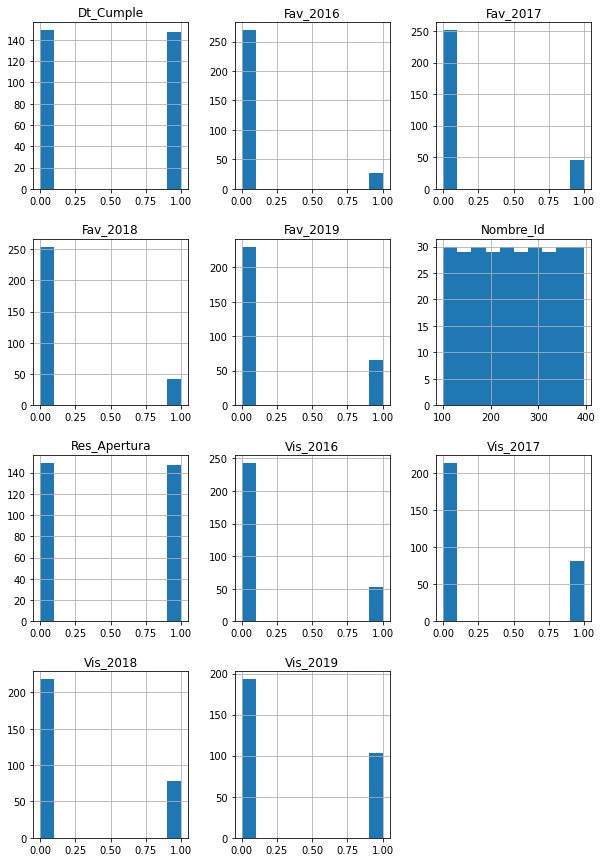

In [58]:
# graficamos las variables para seleccionar las que tengan menos interaccion de respuesta y disminuir las variables para una mayor eficacia de los modelos 
plt.rcParams['figure.figsize']= [10.,15]
datos.drop([],1).hist()
plt.show()

In [59]:
# eliminamos las variables que no aportan informacion al modelo.
datos.drop(['Nombre_Id', 'Dt_Cumple','Vis_2016', 'Vis_2017', 'Vis_2018','Vis_2019'], axis=1 ,inplace=True)

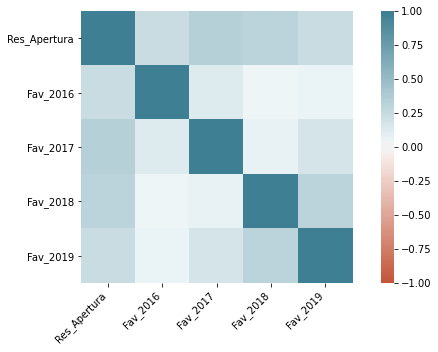

In [60]:
# realizamos una grafica de colores que indican segun su color la correlacion de las variables independientes con la variable dependiente
plt.rcParams['figure.figsize'] = (10.0, 05.0)

corr = datos.corr()

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

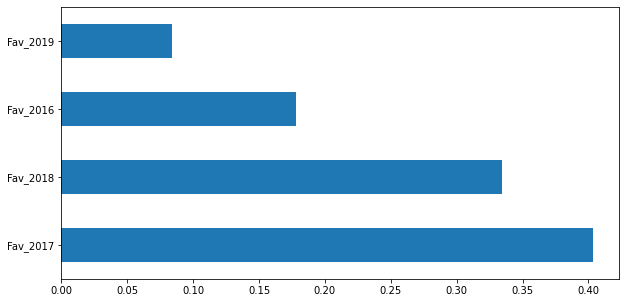

In [61]:
# Seleccionamos los datos con mayor correlacion con  feature selection 
#feature selection

X = datos.iloc[:, datos.columns !='Res_Apertura']  # columnas independientes
y = datos.Res_Apertura   # Columna objetivo

model = ExtraTreesClassifier()
model.fit(X,y)

#print(model.feature_importances_) #construye inbuilt class feature_importances de tree based classifiers
#grafica feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

LR: 0.723908 (0.103142)
LDA: 0.744368 (0.109335)
KNN: 0.680230 (0.164257)
CART: 0.710230 (0.100222)
NB: 0.744368 (0.109335)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.710230 (0.100222)


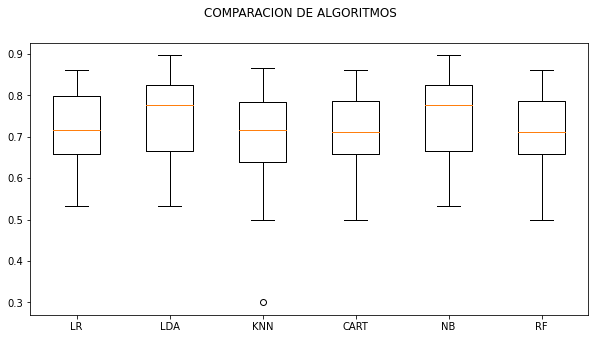

In [62]:
# Seleccionamos las variables mas factibles para la prediccion y las utilizamos para usarlas en los diferentes modelos. 
# load dataset
feature_names = ['Fav_2016','Fav_2017' ,'Fav_2018','Fav_2019']
 
X = datos[feature_names]
Y = datos['Res_Apertura']
 
dataframe = datos
 
array = dataframe.values
#print(Y)
# prepare configuration for cross validation test harness
seed = 7
# prepare models
 
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
# models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('COMPARACION DE ALGORITMOS')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
model = linear_model.LinearDiscriminantAnalysis()
model.fit(X,Y)
print("precision de predicciones = ",model.score(X,Y))
validation_size = 0.70
from sklearn.model_selection import train_test_split
 
x_train,x_validation,y_train,y_validation = model_selection.train_test_split(X,Y, test_size = validation_size )
nombre= "analisis descriminacion lineal"
muestra = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model,x_train, y_train, cv=muestra, scoring= 'accuracy')
# msg = "%s: %f (%f)" %(nombre,cv_results.mean(), cv_results.std())
#print(msg)
 
predictions = model.predict(x_validation)
print("exactitud de predicion : ", accuracy_score(y_validation,predictions))
#print(confusion_matrix(y_validation,predictions))